In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

C:\Users\VishalSharma\Anaconda3\lib\site-packages\scipy\__init__.py:149: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.16.2
  UserWarning)


# Read Dataset

In [2]:
data=pd.read_csv("loan_data_set.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y



# Exploratory Data Analysis

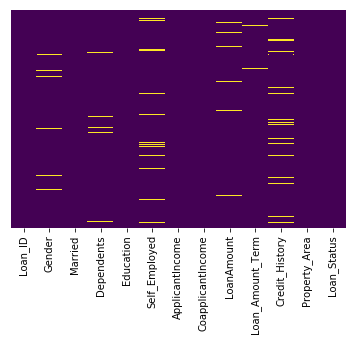

In [3]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [4]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Filling Null/NaN Values

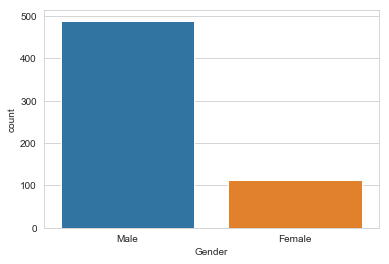

In [5]:
sns.set_style("whitegrid")
sns.countplot(x="Gender",data=data)

In [6]:
data["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [7]:
data["Gender"]=pd.get_dummies(data["Gender"]) #0-Male 1-Female

In [8]:
data["Gender"].isnull().sum()

0

In [9]:
data["Gender"].value_counts()

0    502
1    112
Name: Gender, dtype: int64

Married Column Encoding

In [10]:
data["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [11]:
data["Married"]=pd.get_dummies(data["Married"])

In [12]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,1,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,0,0,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,0,0,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,0,0,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,0,1,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
data["Married"].value_counts()

0    401
1    213
Name: Married, dtype: int64

In [14]:
data["Dependents"].value_counts()

0     345
1     102
2     101
3+     50
3       1
Name: Dependents, dtype: int64

In [15]:
data["Dependents"].dtype

dtype('O')

In [16]:
mask=pd.DataFrame()

In [17]:
mask=pd.get_dummies(data["Dependents"],prefix="Dependents")

In [18]:
del(data["Dependents"])

In [19]:
data.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,1,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,0,0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,0,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,0,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,0,1,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [20]:
mask.head()

,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Dependents_3+
0,1,0,0,0,0
1,0,1,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [21]:
frame=[data,mask]

In [22]:
data = pd.concat([data, mask], axis=1, join='inner')

In [23]:
data.shape

(614, 17)

In [24]:
mask.shape

(614, 5)

In [25]:
data.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Dependents_3+
0,LP001002,0,1,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1,0,0,0,0
1,LP001003,0,0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0,1,0,0,0
2,LP001005,0,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,0,0,0,0
3,LP001006,0,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,0,0,0,0
4,LP001008,0,1,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,0,0,0


In [26]:
data.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Dependents_3+
0,LP001002,0,1,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1,0,0,0,0
1,LP001003,0,0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0,1,0,0,0
2,LP001005,0,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,0,0,0,0
3,LP001006,0,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,0,0,0,0
4,LP001008,0,1,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,0,0,0


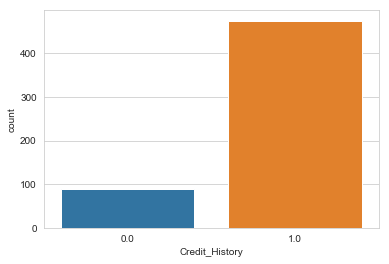

In [27]:
sns.countplot(data["Credit_History"])

In [28]:
data["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [29]:
data["Self_Employed"].fillna("Yes",inplace=True)

In [30]:
le=LabelEncoder()

In [31]:
data["Self_Employed"]=le.fit_transform(data["Self_Employed"])

In [32]:
data["LoanAmount"].fillna(data["LoanAmount"].mean(),inplace=True)

In [33]:
data["Loan_Amount_Term"].fillna(data["LoanAmount"].mean(),inplace=True)

In [34]:
data["Credit_History"].fillna(0.0,inplace=True)

In [35]:
data.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Dependents_3+
0,LP001002,0,1,Graduate,0,5849,0.0,146.412162,360.0,1.0,Urban,Y,1,0,0,0,0
1,LP001003,0,0,Graduate,0,4583,1508.0,128.000000,360.0,1.0,Rural,N,0,1,0,0,0
2,LP001005,0,0,Graduate,1,3000,0.0,66.000000,360.0,1.0,Urban,Y,1,0,0,0,0
3,LP001006,0,0,Not Graduate,0,2583,2358.0,120.000000,360.0,1.0,Urban,Y,1,0,0,0,0
4,LP001008,0,1,Graduate,0,6000,0.0,141.000000,360.0,1.0,Urban,Y,1,0,0,0,0


In [36]:
data["Education"]=le.fit_transform(data["Education"])

In [37]:
data["Property_Area"]=pd.get_dummies(data["Property_Area"],prefix="Property")

In [38]:
data["Loan_Status"]=le.fit_transform(data["Loan_Status"])

In [39]:
data.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Dependents_3+
0,LP001002,0,1,0,0,5849,0.0,146.412162,360.0,1.0,0,1,1,0,0,0,0
1,LP001003,0,0,0,0,4583,1508.0,128.000000,360.0,1.0,1,0,0,1,0,0,0
2,LP001005,0,0,0,1,3000,0.0,66.000000,360.0,1.0,0,1,1,0,0,0,0
3,LP001006,0,0,1,0,2583,2358.0,120.000000,360.0,1.0,0,1,1,0,0,0,0
4,LP001008,0,1,0,0,6000,0.0,141.000000,360.0,1.0,0,1,1,0,0,0,0


# Gaussian distribution

In [40]:
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,4))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()
    

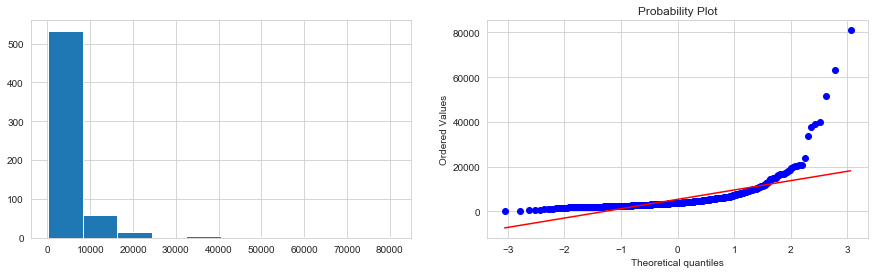

In [41]:
diagnostic_plots(data,'ApplicantIncome')

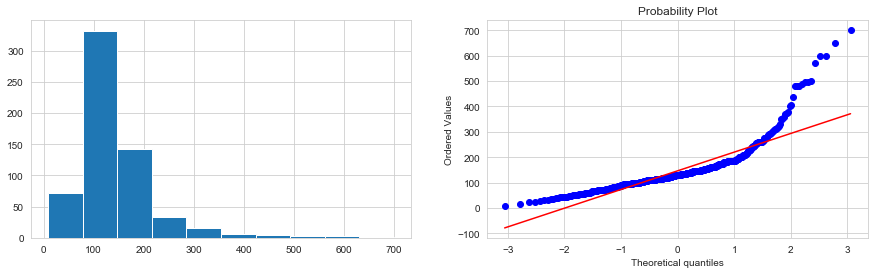

In [42]:
diagnostic_plots(data,'LoanAmount')

In [43]:
X=data.drop(["Loan_ID","Loan_Status"],axis=1)

# Splite DataSet In Dependent and Independent Feature

In [44]:
x=data.loc[:,["ApplicantIncome","LoanAmount","Credit_History","CoapplicantIncome","Loan_Amount_Term"]]
y=data.iloc[:,11]

In [45]:
x.head()

,ApplicantIncome,LoanAmount,Credit_History,CoapplicantIncome,Loan_Amount_Term
0,5849,146.412162,1.0,0.0,360.0
1,4583,128.000000,1.0,1508.0,360.0
2,3000,66.000000,1.0,0.0,360.0
3,2583,120.000000,1.0,2358.0,360.0
4,6000,141.000000,1.0,0.0,360.0


In [46]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

# Feature Selection

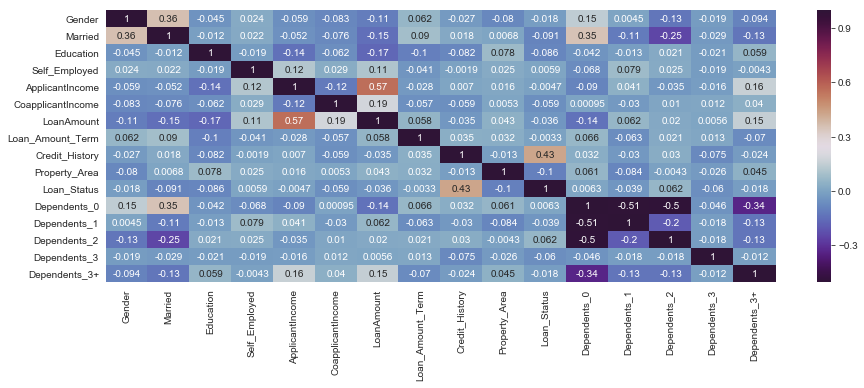

In [47]:
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(),annot=True,cmap="twilight_shifted")

# Second way to find feature selection

In [48]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [49]:
model.feature_importances_

array([0.03024431, 0.02852218, 0.02657059, 0.03172149, 0.2089499 ,
       0.13356814, 0.20854665, 0.06006509, 0.18063412, 0.03099942,
       0.01919269, 0.01608793, 0.01262708, 0.00156213, 0.01070829])

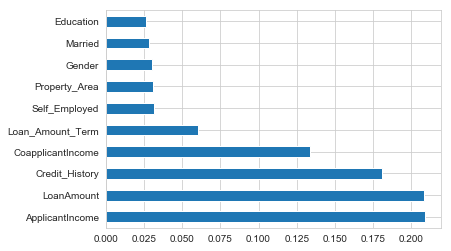

In [50]:
feature_impotances=pd.Series(model.feature_importances_,index=X.columns)
feature_impotances.nlargest(10).plot(kind='barh')
plt.show()

In [51]:
feature_impotances.nlargest(5)

ApplicantIncome      0.208950
LoanAmount           0.208547
Credit_History       0.180634
CoapplicantIncome    0.133568
Loan_Amount_Term     0.060065
dtype: float64

In [52]:
#sns.pairplot(data)

# Model Selection

In [53]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.08,random_state=0)

In [54]:
Reg=RandomForestClassifier(n_estimators=380)

In [55]:
Reg.fit(train_x,train_y)
pred_y=Reg.predict(test_x)

In [56]:
print(Reg.score(train_x,train_y)*100)
print(Reg.score(test_x,test_y)*100)

100.0
82.0


# Model_Evaluation
RandomizedSearchCv

In [57]:
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV

In [58]:
param_grid = {
    'bootstrap': [True,False],
    'max_depth': [80, 90, 100,70,60,120,130,110,None],
    'min_samples_leaf': [3, 4, 5,6,2,7,8,9,10,11,13],
    'min_samples_split': [8, 10, 12,7,5,9,11,15],
    'n_estimators': [200, 500,100,400,200,150, 300, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [59]:
def hypertuning_rscv(est, p_distr, nbr_iter,x,y):
    rdmsearch = RandomizedSearchCV(Reg, param_distributions=param_grid,
                                  n_jobs=-1, n_iter=nbr_iter, cv=9)
    #CV = Cross-Validation ( here using Stratified KFold CV)
    rdmsearch.fit(x,y)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score

rf_parameters, rf_ht_score = hypertuning_rscv(Reg,param_grid, 40,train_x, train_y)

In [60]:
rf_parameters

{'n_estimators': 1000,
 'min_samples_split': 11,
 'min_samples_leaf': 10,
 'max_features': 'log2',
 'max_depth': 4,
 'criterion': 'gini',
 'bootstrap': True}

In [86]:
Reg1=RandomForestClassifier(n_estimators=1000,criterion="gini",min_samples_split= 11,min_samples_leaf=10,max_features='auto',max_depth= 4,bootstrap= True)

In [87]:
Reg1.fit(train_x.values,train_y.values)
pred_y1=Reg1.predict(test_x.values)

In [88]:
print(Reg1.score(train_x,train_y)*100)
print(Reg1.score(test_x,test_y)*100)

C:\Users\VishalSharma\Anaconda3\lib\site-packages\sklearn\base.py:435: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


76.24113475177306


C:\Users\VishalSharma\Anaconda3\lib\site-packages\sklearn\base.py:435: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


88.0


In [89]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix

In [90]:
cm1=accuracy_score(test_y,pred_y1)
print("Accuracy Of Model is:",cm1*100,'%')

Accuracy Of Model is: 88.0 %


In [91]:
import pickle

In [92]:
pickle.dump(Reg1,open("Loan2.pkl","wb"))

In [93]:
Reg1.predict([[3173,74.000000,1.0,0.0,360.000000]])

array([1])